In [1]:
import pandas 
import numpy as np
basic_data = [1,2,3,4,5,5,4,3,2,1,1,2,3,4,5]
instance = 1
scale = 0.2
positive = [basic_data]
for _ in range(instance):
    erosion = np.random.normal(loc=0.0, scale=scale, size=15)
    erosion = erosion.tolist()
    secodary_data = [x + y for x, y in zip(basic_data, erosion)]
    positive.append(secodary_data)
positive = np.array(positive)
positive_label = np.ones(instance+1)
positive = np.concatenate((positive, positive_label.reshape(-1,1)), axis=1)
positive

array([[1.        , 2.        , 3.        , 4.        , 5.        ,
        5.        , 4.        , 3.        , 2.        , 1.        ,
        1.        , 2.        , 3.        , 4.        , 5.        ,
        1.        ],
       [1.050314  , 1.52214102, 2.9087677 , 3.96725335, 4.88215757,
        5.22215314, 4.06170019, 3.05078144, 2.11166709, 1.09440455,
        1.61470216, 1.86749566, 2.94294491, 3.97553724, 4.81504755,
        1.        ]])

In [2]:
basic_negative_data = [5,4,3,2,1,1,2,3,4,5,5,4,3,2,1]
negative = [basic_negative_data]
for _ in range(instance):
    erosion = np.random.normal(loc=0.0, scale=scale, size=15)
    erosion = erosion.tolist()
    second_negative_data = [x + y for x, y in zip(basic_negative_data, erosion)]
    negative.append(second_negative_data)

negative = np.array(negative)
negative_label = np.zeros(instance+1)
negative = np.concatenate((negative, negative_label.reshape(-1,1)), axis=1)
negative

array([[5.        , 4.        , 3.        , 2.        , 1.        ,
        1.        , 2.        , 3.        , 4.        , 5.        ,
        5.        , 4.        , 3.        , 2.        , 1.        ,
        0.        ],
       [4.90425627, 3.64845132, 2.79960358, 1.92388531, 0.77335964,
        1.1016727 , 1.8005917 , 3.22568814, 4.1064232 , 5.15469123,
        5.21680123, 3.83514138, 2.85907396, 2.10432907, 0.86462867,
        0.        ]])

In [3]:
columns = []
for i in range(len(basic_data)):
    columns.append(f"t_{i}")
columns.append("label")
positive_df = pandas.DataFrame(positive, columns=columns)
negative_df = pandas.DataFrame(negative, columns=columns)
all_data = pandas.concat([positive_df, negative_df])
all_data.to_csv("demo_threepatten_train.csv", index=False)


In [4]:

data = pandas.read_csv("demo_threepatten_train.csv")


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
positive_data = data[data['label'] == 1]
negative_data = data[data['label'] == 0]
positive_data = positive_data.drop(columns=['label']).to_numpy()
negative_data = negative_data.drop(columns=['label']).to_numpy()
positive_data

array([[1.        , 2.        , 3.        , 4.        , 5.        ,
        5.        , 4.        , 3.        , 2.        , 1.        ,
        1.        , 2.        , 3.        , 4.        , 5.        ],
       [1.050314  , 1.52214102, 2.9087677 , 3.96725335, 4.88215757,
        5.22215314, 4.06170019, 3.05078144, 2.11166709, 1.09440455,
        1.61470216, 1.86749566, 2.94294491, 3.97553724, 4.81504755]])

In [6]:
positive_data_nor = (positive_data - positive_data.min()) / (positive_data.max() - positive_data.min())
negative_data_nor = (negative_data - negative_data.min()) / (negative_data.max() - negative_data.min())
positive_data_nor

array([[0.        , 0.23684598, 0.47369196, 0.71053794, 0.94738392,
        0.94738392, 0.71053794, 0.47369196, 0.23684598, 0.        ,
        0.        , 0.23684598, 0.47369196, 0.71053794, 0.94738392],
       [0.01191667, 0.123667  , 0.45208396, 0.70278203, 0.91947342,
        1.        , 0.72515138, 0.48571934, 0.26329388, 0.02235934,
        0.14558974, 0.20546286, 0.46017869, 0.70474404, 0.90357868]])

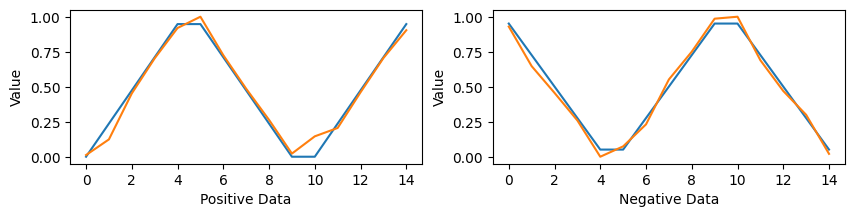

In [7]:
# plot all positive data in different axis 
f, axs = plt.subplots(1, 2, figsize=(10, 2), gridspec_kw=dict(width_ratios=[4, 4]))
axs[0].set_xlabel('Positive Data')
axs[0].set_ylabel('Value')
axs[1].set_xlabel('Negative Data')
axs[1].set_ylabel('Value')
sns.lineplot(data=positive_data_nor[0],ax=axs[0], legend=True)
sns.lineplot(data=positive_data_nor[1],ax=axs[0])
sns.lineplot(data=negative_data_nor[0],ax=axs[1], legend=True)
sns.lineplot(data=negative_data_nor[1],ax=axs[1], legend=True)
plt.savefig('demo_threepatten_train.pdf',bbox_inches='tight')